# Introducción Librería DEAP para optimización

La librería DEAP es una librería de Python que permite realizar optimización de parámetros de modelos matemáticos aplicando algiritmos evolutivos. La librería es flexible y permite construir modelos de optimización de parámetros de forma sencilla.

La librería DEAP se puede instalar en colab con el comando: `!pip install deap`

[Documentación DEAP](https://deap.readthedocs.io/en/master/).




# Ejemplo 1: Ajuste de curva
Diego R. Páez Ardila


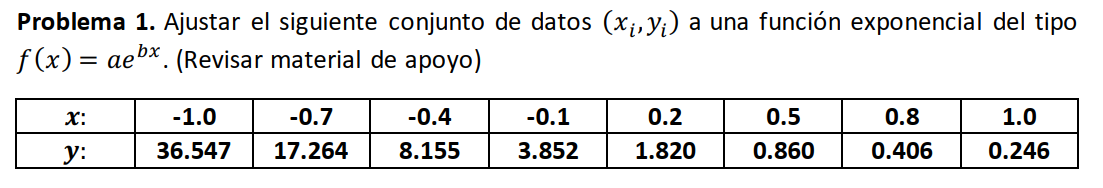

## Instalación de Paquetes

In [3]:
# https://deap.readthedocs.io/en/master/
!pip install deap

In [4]:
# Bibliotecas a serem utilizadas
import random
import numpy as np
from deap import algorithms, base, creator, tools

## Preparación para Optimización

1. **Función objetivo**:
2. **Variables de decisión**
3. **Operadores**

In [5]:
"""
Función Objetivo para evaluación de invidivudos
"""
def objetive_function(individual):
  """
  Función objetivo para optimización del problema de ajuste de curva

  Args:
      individual (list): Lista que contiene los indiviudos que genera el algorítmo

  Returns:
      Tuple: Resultados evaluación función de costo
  """
  #codigo de la función
  x_ref = [-1.0,-0.7,-0.4,-0.1,0.2,0.5,0.8,1.0]
  y_ref = [36.547, 17.264, 8.155, 3.852,1.820, 0.860, 0.406, 0.246]
  
  y_exp = individual[0]*np.exp(individual[1]*np.asarray(x_ref))

  result = (np.square(y_ref - y_exp)).mean()
  #resultado retorna como tupla (result)
  return (result,)

## Tipos de Datos

1. `creator.create("FitnessMin", base.Fitness, weights=(-1.0,))`: Se crea un tipo de dato para el fitness de la función objetivo. En este caso se crea un tipo de dato para minimizar la función objetivo.
2. `creator.create("Individual", list, fitness=creator.FitnessMin)`: Se crea un tipo de dato para el individuo. En este caso se crea un tipo de dato para un individuo que es una lista de números reales.

In [6]:
# https://deap.readthedocs.io/en/master/tutorials/basic/part1.html
# Creación estructura de fitness(desempeño) e individuo
# para problema de maximización el peso es positivo y minimización el peso es negativo
creator.create("FitnessMax", base.Fitness, weights=(-1.0,)) 
creator.create("Individual", list, fitness=creator.FitnessMax)

## Inicialización

3. `toolbox = base.Toolbox()`: Se crea un objeto de la clase `base.Toolbox` que permite definir funciones para la optimización.
4. `toolbox.register("attr_float", random.uniform, -10, 10)`: Se registra una función para generar un número aleatorio entre -10 y 10.
5. `toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)`: Se registra una función para generar un individuo. En este caso se genera un individuo con dos números aleatorios entre -10 y 10.
6. `toolbox.register("population", tools.initRepeat, list, toolbox.individual)`: Se registra una función para generar una población. En este caso se genera una población de 100 individuos.


In [7]:
toolbox = base.Toolbox()

# Generador de atributos reales: nombre, función que genera cada variable, intervalo (limite superior e inferior)
toolbox.register("attr_real", random.uniform,-10.0,10.0)

# Generador de individuo
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_real, 2)

# Generar la población
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

## Operadores

7. `toolbox.register("evaluate", objetive_function)`: Se registra una función para evaluar la función objetivo. En este caso se registra la función `evalOneMax`.
8. `toolbox.register("mate", tools.cxTwoPoint)`: Se registra una función para realizar el cruce de dos individuos. En este caso se registra la función `tools.cxTwoPoint`.
9. `toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)`: Se registra una función para realizar la mutación de un individuo. En este caso se registra la función `tools.mutGaussian`.
10. `toolbox.register("select", tools.selTournament, tournsize=3)`: Se registra una función para seleccionar individuos de la población. En este caso se registra la función `tools.selTournament`.

In [8]:
#Inicializar Operadores: https://deap.readthedocs.io/en/master/api/tools.html
toolbox.register("evaluate",objetive_function)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, eta=0.5,low=-10.0, up= 10.0)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb =0.05)
toolbox.register("select",tools.selTournament, tournsize=3)

## Población Inicial

11. `pop = toolbox.population(n=100)`: Se genera una población de 100 individuos.
12. `hof = tools.HallOfFame(1)`: Se crea un objeto de la clase `tools.HallOfFame` que permite almacenar los mejores individuos de la población.
13. `stats = tools.Statistics(lambda ind: ind.fitness.values)`: Se crea un objeto de la clase `tools.Statistics` que permite almacenar estadísticas de la población.
14. `stats.register("avg", np.mean)`: Se registra una función para calcular la media de la población.
15. `stats.register("std", np.std)`: Se registra una función para calcular la desviación estándar de la población.
16. `stats.register("min", np.min)`: Se registra una función para calcular el mínimo de la población.
17. `stats.register("max", np.max)`: Se registra una función para calcular el máximo de la población.


In [9]:
pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

## Ciclo Evolutivo

18. `pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, stats=stats, halloffame=hof, verbose=True)`: Se ejecuta el algoritmo genético simple para optimizar la función objetivo.

In [15]:
pop, log =algorithms.eaSimple(population=pop, 
                              toolbox=toolbox, 
                              cxpb=0.5, 
                              mutpb=0.1, 
                              ngen=100, 
                              stats=stats, 
                              halloffame=hof, 
                              verbose=0)

## Resultados

19. `print(hof[0])`: Se imprime el mejor individuo de la población.
20. `print(hof[0].fitness.values)`: Se imprime el fitness del mejor individuo de la población. 

In [11]:
# A melhor solução
print("Melhor Individuo: ")
print(hof[0])


# Validação do melhor indivíduo
print("Fitness:")
print(objetive_function(hof[0]))

Melhor Individuo: 
[3.6686748932926587, -2.2747462176238202]
Fitness:
(0.4049371733227033,)


# Gráfico de la función para la validación del resultado

In [12]:
x_ref = [-1.0,-0.7,-0.4,-0.1,0.2,0.5,0.8,1.0]
y_ref = [36.547, 17.264, 8.155, 3.852,1.820, 0.860, 0.406, 0.246]

A = hof[0][0]
B = hof[0][1] 
y_exp = A*np.exp(B*np.asarray(x_ref))


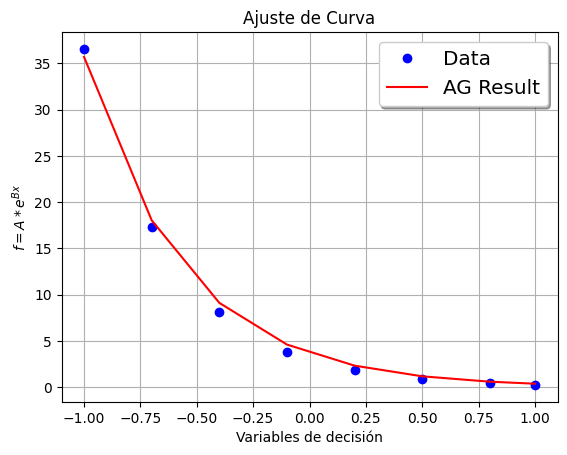

In [16]:
import matplotlib.pyplot as plt
plt.plot(x_ref,y_ref,'bo', label='Data', )
plt.plot(x_ref,y_exp,color="red",label='AG Result')

plt.title("Ajuste de Curva")
plt.xlabel("Variables de decisión")
plt.ylabel(r'$f=A*e^{Bx}$')
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(True)
plt.show()